# Análisis de Retornos y Riesgos



---

## I. Retornos

### 1. Retorno simple

El retorno simple mide el cambio porcentual en el precio de un activo entre dos momentos consecutivos en el tiempo. Se expresa como:

$$
r_t = \frac{P_{t+1} - P_t}{P_t} = \frac{P_{t+1}}{P_t} - 1
$$

Donde:
- $P_t$ es el precio en el momento $t$.
- $r_t$ es el retorno simple entre $t$ y $t+1$.


### 2. Retorno compuesto

Cuando evaluamos el desempeño de un activo en un período mayor a una unidad de tiempo (por ejemplo, varios días, semanas o meses), utilizamos el **retorno compuesto**:

$$
R_{t,t+k} = \prod_{i=1}^{k}(1 + r_{t+i-1}) - 1
$$

Este retorno tiene en cuenta el efecto acumulativo de los rendimientos a lo largo del tiempo.

> *Si el retorno es constante en cada periodo, el retorno compuesto se simplifica a:*

$$
R_{t,t+k} = (1 + r)^k - 1
$$


### 3. Retorno anualizado

El retorno anualizado nos permite comparar activos medidos en diferentes frecuencias temporales:

$$
R_{anual} = (1 + R)^{f} - 1
$$

Donde:
- $R$ es el retorno compuesto observado.
- $f$ es la cantidad de periodos por año:
  - 252 si los datos son diarios.
  - 52 si son semanales.
  - 12 si son mensuales.


---

## II. Volatilidad

### 1. ¿Qué es la volatilidad?

La volatilidad mide la dispersión o variabilidad de los retornos. Es una forma de cuantificar el riesgo de un activo financiero:

$$
\sigma = \sqrt{ \frac{1}{N-1} \sum_{t=1}^{N}(r_t - \bar{r})^2 }
$$

Donde:
- $r_t$ es el retorno en el periodo $t$.
- $\bar{r}$ es el retorno promedio.
- $N$ es el número total de observaciones.


### 2. Volatilidad anualizada

Para poder comparar riesgos de activos evaluados en distintas frecuencias, se ajusta la volatilidad según el número de periodos al año:

$$
\sigma_{anual} = \sigma_{muestral} \cdot \sqrt{f}
$$

Donde:
- $\sigma_{muestral}$ es la volatilidad calculada sobre los datos disponibles.
- $f$ es:
  - 12 para datos mensuales.
  - 52 para datos semanales.
  - 252 para datos diarios.

> *Este ajuste asume que los retornos son independientes e idénticamente distribuidos.*

---

## III. Medidas de Retorno Ajustado al Riesgo

### 1. Retorno sobre riesgo (Return per unit of risk)

Esta métrica permite entender **cuánto retorno se obtiene por cada unidad de riesgo asumido**:

$$
\text{ROR} = \frac{R}{\sigma}
$$

Donde:
- $R$ es el retorno compuesto del periodo.
- $\sigma$ es la volatilidad en el mismo periodo.


### 2. Ratio de Sharpe

El ratio de Sharpe evalúa la rentabilidad de una inversión ajustada por su riesgo, considerando además el retorno libre de riesgo:

$$
\text{Sharpe} = \frac{R - R_f}{\sigma}
$$

Donde:
- $R$ es el retorno del activo.
- $R_f$ es la tasa libre de riesgo (benchmark).
- $\sigma$ es la desviación estándar de los retornos.

Un valor más alto indica una mejor relación riesgo-retorno.


### 3. Drawdown máximo

El **drawdown máximo** mide la mayor caída desde un pico histórico en la evolución de una inversión. Es decir, cuánta pérdida hubiéramos sufrido si comprábamos en el punto más alto y vendíamos en el punto más bajo posterior.

Pasos para calcularlo:

1. Calcular el **índice de riqueza (wealth index)**: valor acumulado del portafolio con los retornos compuestos (usando `cumprod()`).
2. Identificar los **picos anteriores** (máximos históricos del wealth index).
3. Calcular el **drawdown** como:

   - En valor absoluto: `wealth_index - previous_peaks`
   - En porcentaje: `(wealth_index - previous_peaks) / previous_peaks`

Esto muestra cuánto se ha caído desde el último máximo.

---

---

---

-----------------
### PARTE PRACTICA 


In [60]:
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

import seaborn as sns

# Archivo personalizado
import edhec_kit as erk

Cargamos el conjunto de datos de Fama-French para obtener los retornos de los deciles superior e inferior por capitalización de mercado.

In [61]:
ffrench = erk.get_ffme_returns()
ffrench.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


Graficamos los retornos para SmallCap y LargeCap

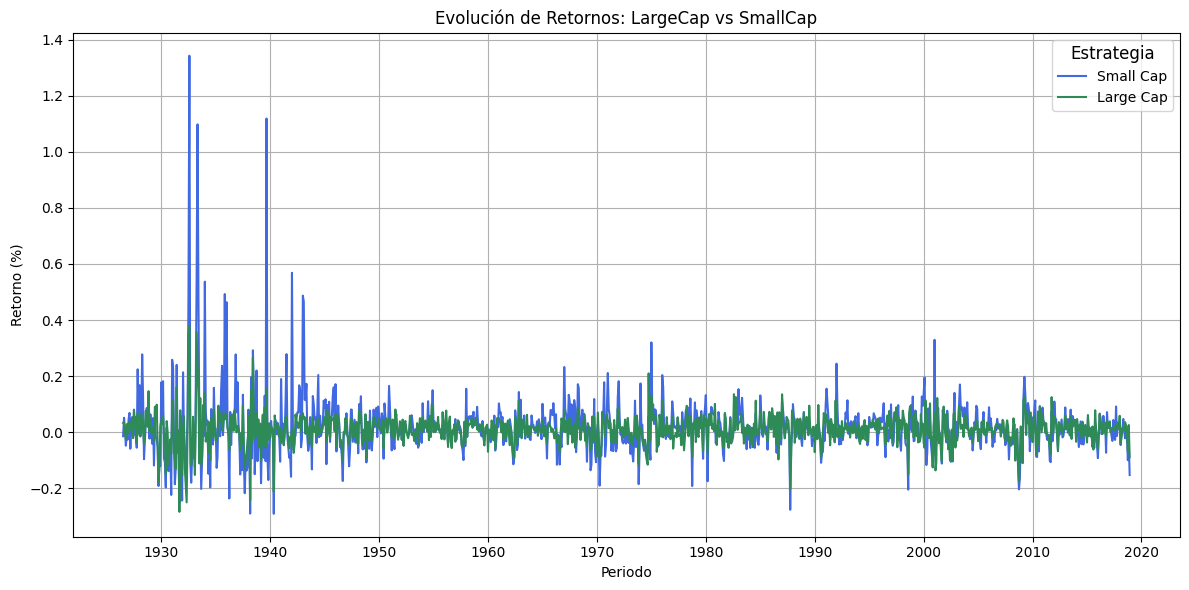

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=ffrench, x=ffrench.index, y='SmallCap', ax=ax, label='Small Cap', color='royalblue')
sns.lineplot(data=ffrench, x=ffrench.index, y='LargeCap', ax=ax, label='Large Cap', color='seagreen')

ax.set_title('Evolución de Retornos: LargeCap vs SmallCap')
ax.set_xlabel('Periodo', fontsize=10)
ax.set_ylabel('Retorno (%)', fontsize=10)

ax.grid(True, alpha=1)
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.legend(title='Estrategia', title_fontsize='12', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

Calculamos el retorno mensual para cada portafolio de acciones

In [63]:
nmeses = ffrench.shape[0] ## Número de meses
retorno_total = (1+ffrench).prod() - 1 ## .prod() multiplica todos esos factores
retorno_mensual = ((1 + retorno_total)**(1/nmeses))-1 ## Media geométrica para calcular el retorno mensual

print('Retorno mensual por portafolio:')
for col in retorno_mensual.index:
    print(f'{col}: {retorno_mensual[col]*100:.2f}% mensual')

Retorno mensual por portafolio:
SmallCap: 1.30% mensual
LargeCap: 0.74% mensual


Calculamos el retorno anual para cada portafolio de acciones

In [64]:
# Utilizando la fórmula con retornos mensuales
retorno_anual = ((1 + retorno_mensual)**12) - 1

print('Retorno anual por portafolio:')
for col in retorno_anual.index:
    print(f'{col}: {retorno_anual[col]*100:.2f}% anual')

Retorno anual por portafolio:
SmallCap: 16.75% anual
LargeCap: 9.28% anual


Calculamos la volatibilidad anualizada para cada portafolio

In [65]:
vol_mensual = ffrench.std()

vol_anual = vol_mensual * np.sqrt(12)

print('La Volatibilidad Anual por Portafolio es:')
for col in vol_anual.index:
    print(f'{col}: {vol_anual[col]*100:.2f}% anual')

La Volatibilidad Anual por Portafolio es:
SmallCap: 36.82% anual
LargeCap: 18.67% anual


Calcula el indicador ROR y el Ratio de Sharpe para cada portafolio

In [66]:
ROR = retorno_anual / vol_anual

print('El ROR de cada Portafolio es:')
for col in ROR.index:
    print(f'{col}: {ROR[col]:.3f}')

El ROR de cada Portafolio es:
SmallCap: 0.455
LargeCap: 0.497


In [67]:
# Suponiendo una activo libre de riesgo de 3% de rentabilidad, entonces:
risk_free_rate = 0.03

sharpe_ratio = (retorno_anual - risk_free_rate)/vol_anual

print('El Sharpe Ratio para cada Portafolio es:')
for col in sharpe_ratio.index:
    print(f'{col}: {sharpe_ratio[col]:.3f}')

El Sharpe Ratio para cada Portafolio es:
SmallCap: 0.373
LargeCap: 0.336


Calculamos el Máximo Drawdown

In [68]:
wealth_index = 100 * (1 + ffrench).cumprod() ## Calcular el índice de riqueza (utilizamos la función: cumprod())
previous_peaks = wealth_index.cummax() ## Calcular los peaks históricos (utilizamos la función: cunmax())

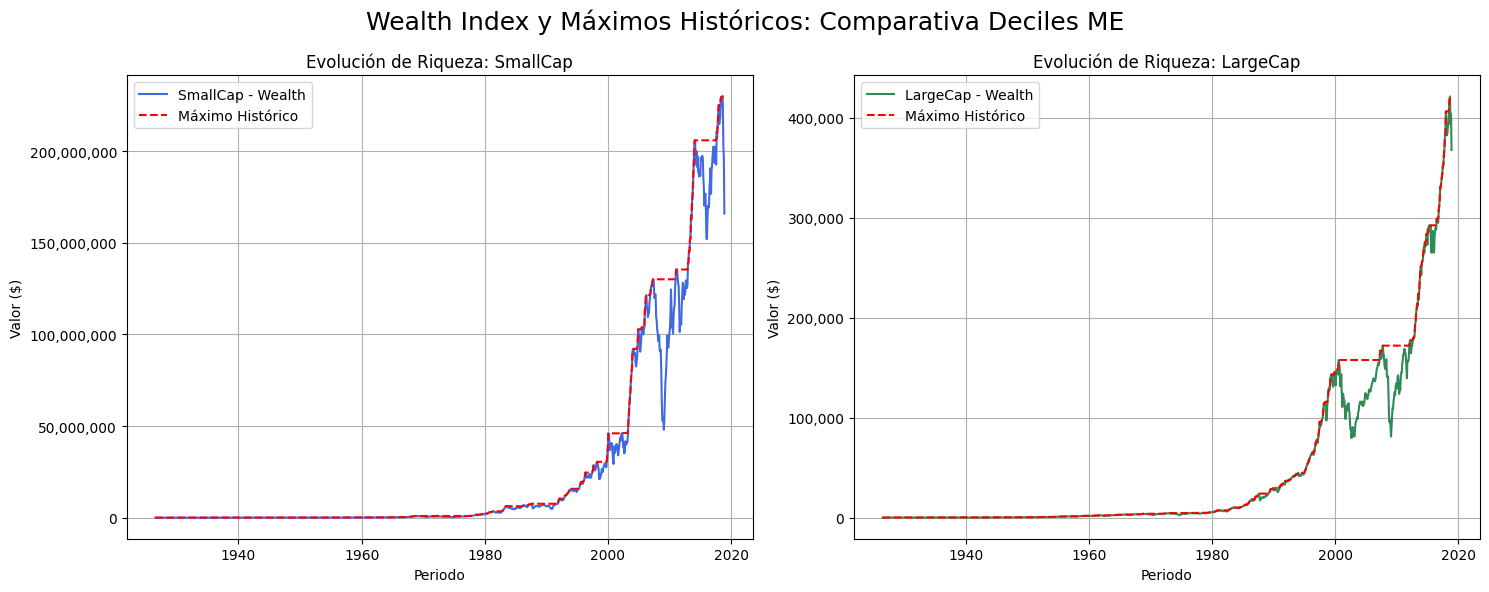

In [69]:
fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=2)

sns.lineplot(data=wealth_index, x=wealth_index.index, y='SmallCap', ax=ax[0], label='SmallCap - Wealth', color='royalblue')
sns.lineplot(data=previous_peaks, x=previous_peaks.index, y='SmallCap', ax=ax[0], label='Máximo Histórico', linestyle='--', color='red')

sns.lineplot(data=wealth_index, x=wealth_index.index, y='LargeCap', ax=ax[1], label='LargeCap - Wealth', color='seagreen')
sns.lineplot(data=previous_peaks, x=previous_peaks.index, y='LargeCap', ax=ax[1], label='Máximo Histórico', linestyle='--', color='red')

ax[0].set_title('Evolución de Riqueza: SmallCap')
ax[1].set_title('Evolución de Riqueza: LargeCap')

for a in ax:
    a.grid(True)
    # Formateo del eje Y (Moneda/Miles)
    a.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    a.set_ylabel('Valor ($)', fontsize=10)
    a.set_xlabel('Periodo', fontsize=10)
    a.legend(loc='upper left', frameon=True)
    
    # Formateo de fechas (Eje X)
    a.xaxis.set_major_locator(mdates.YearLocator(20)) 

fig.suptitle('Wealth Index y Máximos Históricos: Comparativa Deciles ME', fontsize=18)

plt.tight_layout()
plt.show()

In [70]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

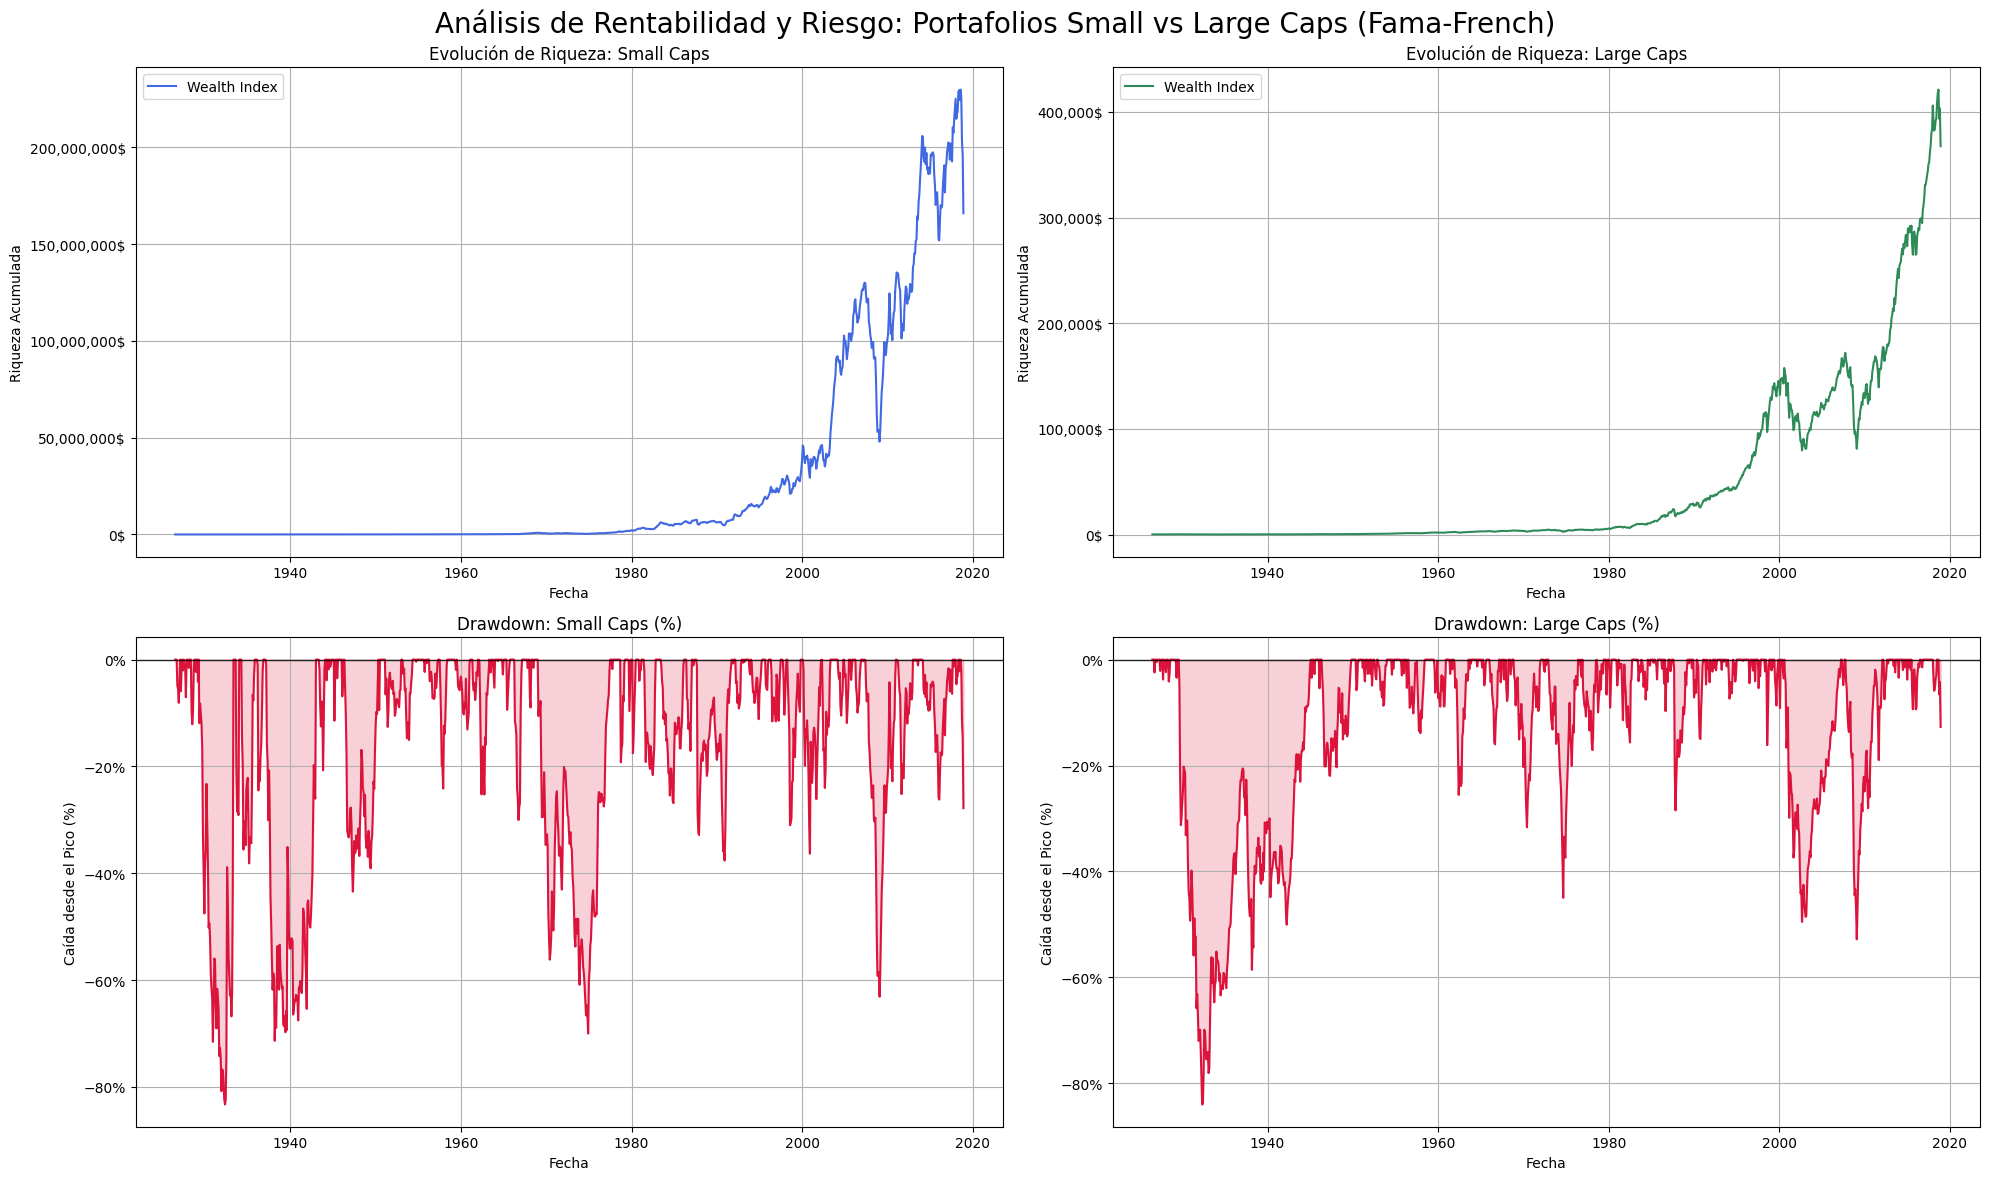

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Small Caps Wealth
sns.lineplot(data=wealth_index, x=wealth_index.index, y='SmallCap', ax=ax[0, 0], color='royalblue', label='Wealth Index')
ax[0, 0].set_title('Evolución de Riqueza: Small Caps')

# Large Caps Wealth
sns.lineplot(data=wealth_index, x=wealth_index.index, y='LargeCap', ax=ax[0, 1], color='seagreen', label='Wealth Index')
ax[0, 1].set_title('Evolución de Riqueza: Large Caps')

# Drawdown Small Caps (%)
sns.lineplot(data=drawdown * 100, x=drawdown.index, y='SmallCap', ax=ax[1, 0], color='crimson')
ax[1, 0].fill_between(drawdown.index, drawdown['SmallCap'] * 100, 0, color='crimson', alpha=0.2)
ax[1, 0].set_title('Drawdown: Small Caps (%)')

# Drawdown Large Caps (%)
sns.lineplot(data=drawdown * 100, x=drawdown.index, y='LargeCap', ax=ax[1, 1], color='crimson')
ax[1, 1].fill_between(drawdown.index, drawdown['LargeCap'] * 100, 0, color='crimson', alpha=0.2)
ax[1, 1].set_title('Drawdown: Large Caps (%)')

for row in ax:
    for a in row:
        a.grid(True)
        a.set_xlabel('Fecha', fontsize=10)
        a.xaxis.set_major_locator(mdates.YearLocator(20)) # Etiquetas cada 20 años

for i in range(2):
    ax[0, i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}$'))
    ax[0, i].set_ylabel('Riqueza Acumulada', fontsize=10)

for i in range(2):
    ax[1, i].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[1, i].axhline(0, color='black', linewidth=1, alpha=0.8)
    ax[1, i].set_ylabel('Caída desde el Pico (%)', fontsize=10)

fig.suptitle('Análisis de Rentabilidad y Riesgo: Portafolios Small vs Large Caps (Fama-French)', 
             fontsize=20)

plt.tight_layout()
plt.show()

Visualizamos distintas crisis

In [72]:
# CRISIS DE 1929
print('\nCrisis de 1929:')
for cap in ['SmallCap', 'LargeCap']:
    min_dd = (drawdown[cap].loc[:'1935']).min() * 100
    # .strftime('%b %Y') convierte el Period a "Jan 1932"
    date_dd = drawdown[cap].loc[:'1935'].idxmin().strftime('%b %Y')
    print(f'  - {cap}: {min_dd:.2f}% en {date_dd}')

# DOT COM CRISIS (2000 - 2002)
print('\nCrisis Dot Com (2000-2002):')
for cap in ["SmallCap", "LargeCap"]:
    min_dd = (drawdown[cap].loc['1995':'2005']).min() * 100
    date_dd = drawdown[cap].loc['1995':'2005'].idxmin().strftime('%b %Y')
    print(f'  - {cap}: {min_dd:.2f}% en {date_dd}')

# CRISIS FINANCIERA GLOBAL (2008)
print('\nCrisis Financiera Global (2008):')
for cap in ['SmallCap', 'LargeCap']:
    min_dd = (drawdown[cap].loc['2007':'2010']).min() * 100
    date_dd = drawdown[cap].loc['2007':'2010'].idxmin().strftime('%b %Y')
    print(f'  - {cap}: {min_dd:.2f}% en {date_dd}')


Crisis de 1929:
  - SmallCap: -83.30% en May 1932
  - LargeCap: -84.00% en May 1932

Crisis Dot Com (2000-2002):
  - SmallCap: -36.34% en Dec 2000
  - LargeCap: -49.52% en Sep 2002

Crisis Financiera Global (2008):
  - SmallCap: -63.12% en Feb 2009
  - LargeCap: -52.81% en Feb 2009
